# __Stocks Dataset - Predictive Analysis__
Prediction of the column __'adjusted_close'__ on July 30, 2021; based on the data from July 1 to July 29, 2021


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
# pip install yfinance

In [2]:
# pip install pandas_datareader

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# Stage 3 - Data Acquisition and Filtering

Data extraction is the process of __collecting__ or retrieving __data__ from a variety of sources, many of which may be poorly organized or completely unstructured.
Then the acquired data is filtered to __remove corrupted data__ that has no value to our predictive analysis.

__Internal data acquisition__

We were provided with an initial dataset about trading stocks

In [5]:
# load dataset
df = pd.read_csv('./dataset.csv')

# rows and columns of the data
print(df.shape)

# visualize the dataset
df.head()

(221046, 22)


,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


__External data acquisition__

We will acquire data of underlying stocks from July 1st, 2021 to July 30, 2021 using the Yahoo Finance API as structured external data.

The columns/attributes of our external data are:

- Date - specifies trading date
- Open - opening price
- High - maximum price during the day
- Low - minimum price during the day
- Close - close price adjusted for splits
- Adj Close - adjusted close price adjusted for both dividends and splits.
- Volume - the number of shares that changed hands during a given day

In [6]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()

# Getting Data From Yahoo Finance API

ticker_list=['SPY'] # Underlying stock --> Value to get the same stock data
start_date = date(year=2021,month=7,day=1) # Data should be from July 1st, 2021
end_date=date(year=2021,month=7,day=30) # until July 30, 2021
files=[]
external_data = pdr.get_data_yahoo(ticker_list, start=start_date, end=end_date)
external_data.reset_index(inplace=True)
external_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-01,428.869995,430.600006,428.799988,430.429993,416.109283,53441000
1,2021-07-02,431.670013,434.100006,430.519989,433.720001,419.289795,57697700
2,2021-07-06,433.779999,434.010010,430.010010,432.929993,418.526062,68710400
3,2021-07-07,433.660004,434.760010,431.510010,434.459991,420.005188,63549500
4,2021-07-08,428.779999,431.730011,427.519989,430.920013,416.582947,97595200


# Stage 4 - Data Extraction

Data extraction is the process of __extracting__ disparate __data__ and __transforming it__ into a __usable format__ for the analysis.

In this case, we need all our data in a __structured and tabular format__.

As we will see, both our __internal__ and __external__ data are in __tabular format__, so we don't need to perform any further extraction to our data.

In [7]:
print(f"Internal dataset number of rows: \t{df.shape[0]}")
print(f"Internal dataset number of columns: \t{df.shape[1]}")
print(f"Internal dataset shape (rows, columns): {df.shape}")

Internal dataset number of rows: 	221046
Internal dataset number of columns: 	22
Internal dataset shape (rows, columns): (221046, 22)


In [8]:
print(f"External dataset number of rows: \t{external_data.shape[0]}")
print(f"External dataset number of columns: \t{external_data.shape[1]}")
print(f"External dataset shape (rows, columns): {external_data.shape}")

External dataset number of rows: 	20
External dataset number of columns: 	7
External dataset shape (rows, columns): (20, 7)


# Stage 5 -Data Validation and Cleansing
On this stage we have to __establish validation rules__ and apply them on our datasets, __removing invalid data__.

For both our internal and external data, we will look for __missing values__ and __null values__.

In [9]:
#Dataset : Data
print("--Internal data null values--")
print(df.isnull().sum())
print("\n--External data null values--")
print(external_data.isnull().sum())

--Internal data null values--
symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

--External data null values--
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Apparently the column __'*'__ presents __192,007 null values__.

We will further analyze their unique values, as well as the total percentage null values

In [10]:
# Analyzing * column
print(df['*'].unique()) # unique values of the column
print(df['*'].value_counts()) # counting values for each unique value of the column
print("Count Null Values : ", df['*'].isnull().sum()) # counting null values
print("Percentage of Null Values : ", df['*'].isnull().sum()/df.shape[0]*100) # percentage of null values from the total values

[nan '*']
*    29039
Name: *, dtype: int64
Count Null Values :  192007
Percentage of Null Values :  86.86291541127186


As the column mostly presents __null values__ and __invalid data__, we will proceed with __removing the column '*'__

In [11]:
#Remove corructed column * from the dataset
df.drop(['*'], axis=1, inplace=True) #Removing the * column just null values

Now we can further analyze the rest of our __columns__ in our internal and external dataset.

In [12]:
print("Information about our Internal Dataset columns")
print(df.info())
print("Information about our External Dataset columns")
print('/n')
print(external_data.info())

Information about our Internal Dataset columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  

Let's perform a __string validation__ to identify the __numerical __and__ categorical columns__ of both dataset

In [13]:
#Perform string Validation Categorical Columns

# Internal Data
vars_num_internal = [c for c in df.columns if df[c].dtypes!='O']
vars_cat_internal = [c for c in df.columns if df[c].dtypes=='O']

# External Data
vars_num_external = [c for c in external_data.columns if external_data[c].dtypes!='O']
vars_cat_external = [c for c in external_data.columns if external_data[c].dtypes=='O']


print("Internal Data")
print("\tNumerical Columns: ",end='')
print(vars_num_internal)
print("\tCategorical Columns: ",end='')
print(vars_cat_internal)
print("External Data")
print("\tNumerical Columns: ",end='')
print(vars_num_external)
print("\tCategorical Columns: ",end='')
print(vars_cat_external)

Internal Data
	Numerical Columns: ['adjusted close', 'strike', 'ask', 'bid', 'mean price', 'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega', 'gamma', 'theta', 'rho']
	Categorical Columns: ['symbol', 'exchange', 'date', 'option symbol', 'expiration', 'call/put', 'style']
External Data
	Numerical Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
	Categorical Columns: []


As we have identified our __categorical columns__, let's __delete leading and tailing white spaces__ on our categorical columns data.

In [14]:
# Perform string validation on categorical columns
for c in vars_cat_internal:
    print(c, df[c].unique())

#Apply strip to all categorical columns
print()
df['option symbol'] = df['option symbol'].str.strip()
df.dtypes

symbol ['SPY']
exchange ['NYSEArca']
date ['07/30/2021' '07/29/2021' '07/28/2021' '07/27/2021' '07/26/2021'
 '07/23/2021' '07/22/2021' '07/21/2021' '07/20/2021' '07/19/2021'
 '07/16/2021' '07/15/2021' '07/14/2021' '07/13/2021' '07/12/2021'
 '07/09/2021' '07/08/2021' '07/07/2021' '07/06/2021' '07/02/2021'
 '07/01/2021']
option symbol ['SPY   210730C00215000' 'SPY   210730P00215000' 'SPY   210730C00220000'
 ... 'SPY   210702P00520000' 'SPY   210702C00530000'
 'SPY   210702P00530000']
expiration ['07/30/2021' '08/02/2021' '08/04/2021' '08/06/2021' '08/09/2021'
 '08/11/2021' '08/13/2021' '08/16/2021' '08/18/2021' '08/20/2021'
 '08/23/2021' '08/25/2021' '08/27/2021' '08/30/2021' '09/01/2021'
 '09/03/2021' '09/07/2021' '09/10/2021' '09/17/2021' '09/30/2021'
 '10/15/2021' '11/19/2021' '12/17/2021' '12/31/2021' '01/21/2022'
 '02/18/2022' '03/18/2022' '03/31/2022' '06/17/2022' '06/30/2022'
 '09/16/2022' '12/16/2022' '01/20/2023' '03/17/2023' '06/16/2023'
 '12/15/2023' '07/28/2021' '07/26/2021' 

symbol                 object
exchange               object
date                   object
adjusted close        float64
option symbol          object
expiration             object
strike                float64
call/put               object
style                  object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                  int64
open interest           int64
stock price for iv    float64
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object

# Stage 6 - Data Aggregation and Representation

As our data is spread in __two datasets__ (internal and external). We need to __integrate both__ datasets together __into a unified view__

We will join both datasets based on the __date__ column as __common field__.

In [15]:
#Joining the two datasets by date

#Data-Internal
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')


#Data-External
external_data['Date'] = pd.to_datetime(external_data['Date'])
external_data.rename(columns={'Date': 'date' , 'Volume': 'Volume_Ext'}, inplace=True)
external_data.columns = external_data.columns.str.lower()
external_data.columns = external_data.columns.str.replace(' ', '_')

In [16]:
# Merging both datasets
dataset = df.merge(external_data, on='date', how='left')
dataset.columns = dataset.columns.str.replace('/', '_')

In [17]:
dataset

,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call_put,style,ask,...,vega,gamma,theta,rho,open,high,low,close,adj_close,volume_ext
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,C,A,219.56,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,P,A,0.01,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,C,A,214.56,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00630000,2023-12-15,630.0,P,A,206.50,...,0.750370,0.001112,-0.011128,-14.857175,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221042,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00635000,2023-12-15,635.0,C,A,2.20,...,0.710649,0.001053,-0.005507,0.496773,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221043,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00635000,2023-12-15,635.0,P,A,211.50,...,0.710649,0.001053,-0.010792,-15.014119,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221044,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00640000,2023-12-15,640.0,C,A,2.73,...,0.672488,0.000997,-0.005217,0.463973,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0


Now we have __1 unified dataset__ with all our data. Let's check its number of rows and columns:

In [18]:
print(f"Unified dataset number of rows: \t{dataset.shape[0]}")
print(f"Unified dataset number of columns: \t{dataset.shape[1]}")
print(f"Unified dataset shape (rows, columns): {dataset.shape}")
dataset.tail()

Unified dataset number of rows: 	221046
Unified dataset number of columns: 	27
Unified dataset shape (rows, columns): (221046, 27)


,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call_put,style,ask,...,vega,gamma,theta,rho,open,high,low,close,adj_close,volume_ext
221041,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00630000,2023-12-15,630.0,P,A,206.50,...,0.750370,0.001112,-0.011128,-14.857175,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221042,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00635000,2023-12-15,635.0,C,A,2.20,...,0.710649,0.001053,-0.005507,0.496773,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221043,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00635000,2023-12-15,635.0,P,A,211.50,...,0.710649,0.001053,-0.010792,-15.014119,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221044,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00640000,2023-12-15,640.0,C,A,2.73,...,0.672488,0.000997,-0.005217,0.463973,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0
221045,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00640000,2023-12-15,640.0,P,A,216.50,...,0.672488,0.000997,-0.010467,-15.169052,428.869995,430.600006,428.799988,430.429993,416.109283,53441000.0


# Stage 7 - Data Analysis

The dataset contains 221,046 rows and 27 columns or features.

The variable we will try to predict is the column __'adjusted_close'__

**We will analyse the following:**

- 7.1 The target variable
- 7.2 Variable types (categorical and numerical)
- 7.3 Missing data
- 7.4. Numerical variables


## 7.1 Target

Let's begin by exploring the target distribution.
First we will __find__ the __unique values__ for every column.

In [19]:
dataset.apply(pd.unique)

symbol                                                            [SPY]
exchange                                                     [NYSEArca]
date                  [2021-07-30T00:00:00.000000000, 2021-07-29T00:...
adjusted_close        [438.51, 440.65, 438.83, 439.01, 441.02, 439.9...
option_symbol         [SPY   210730C00215000, SPY   210730P00215000,...
expiration            [2021-07-30T00:00:00.000000000, 2021-08-02T00:...
strike                [215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245...
call_put                                                         [C, P]
style                                                               [A]
ask                   [224.56, 0.01, 219.56, 214.56, 209.56, 204.56,...
bid                   [223.35, 0.0, 218.35, 213.35, 208.35, 203.35, ...
mean_price            [223.955, 0.0, 218.955, 213.955, 208.955, 203....
iv                    [-1.0, 0.361599, 0.384595, 0.351977, 0.328632,...
volume                [0, 50, 11, 2, 6, 13, 20, 14, 5, 4, 1, 3, 

As we notice, the columns __symbol, exchange,__ and __style__ only have __one value__ throughout the whole dataset.

The column __option_symbol__ has values that are __not relevant__ for our analysis.

These __4 columns won't contribute__ to the analysis so we can proceed to __drop__ them.

In [20]:
# drop symbol column
dataset.drop('symbol', axis=1, inplace=True)
#drop exchange
dataset.drop('exchange', axis=1, inplace=True)
#drop style
dataset.drop('style', axis=1, inplace=True)
#drop option_symbol
dataset.drop('option_symbol', axis=1, inplace=True)

dataset.shape

(221046, 23)

Now we are left with __24 columns__:

That is, __23 are predictive variables__ and __1__ is the __target variable__: __'adjusted_close'__

Let's evaluate the __target distribution__ using a histogram.

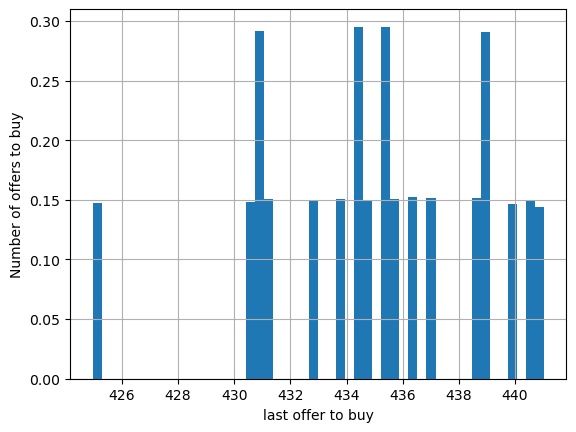

In [21]:
# histogran to evaluate target distribution
dataset['adjusted_close'].hist(bins=50, density=True)
plt.ylabel('Number of offers to buy')
plt.xlabel('last offer to buy')
plt.show()

### 7.2 Variable Types

Next, let's __identify__ the __categorical and numerical variables__ on our 23 predictive columns

In [22]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in dataset.columns if dataset[var].dtype == 'O']

# number of categorical variables
print('Number of categorical variables: ', len(cat_vars), '\n')
print(cat_vars)

Number of categorical variables:  1 

['call_put']


In [23]:
# now let's identify the numerical variables
tem_vars = ['date', 'expiration']

num_vars = [
    var for var in dataset.columns if var not in cat_vars and var != 'adjusted_close'
]

num_vars = list(set(num_vars) - set(tem_vars))
# number of numerical variables
print('Number of numerical variables: ', len(num_vars), '\n')
print(num_vars)

Number of numerical variables:  19 

['low', 'volume', 'stock_price_for_iv', 'strike', 'volume_ext', 'adj_close', 'gamma', 'vega', 'ask', 'iv', 'open', 'delta', 'rho', 'mean_price', 'high', 'close', 'bid', 'open_interest', 'theta']


### 7.3 Missing values

Let's go ahead and find out __which variables/columns__ of the dataset __contain missing values__.

We can also display the __percentage of missing values__ of these variables as follows.

In [24]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missing data

dataset[vars_with_na].isnull().mean().sort_values(ascending=False)

open          0.048524
high          0.048524
low           0.048524
close         0.048524
adj_close     0.048524
volume_ext    0.048524
dtype: float64

Our dataset contains __6 variables__ with __missing values__

This means that to train a machine learning model with this data set, we need to __deal with these varaibles__. (4%)

To deal with them, we will __fill__ our __missing values with__ the __median__ of each column.

In [25]:
#Missing values in numerical variables, with the median
for i in vars_with_na:
    dataset[i].fillna(dataset[i].median(), inplace=True)

### 7.4 Numerical Variables

Now we can deal with the numerical variables.

Let's plot the __last offer to buy__ vs __days__ of July 2021 (from 1 to 29).

Text(0, 0.5, 'last offer to buy')

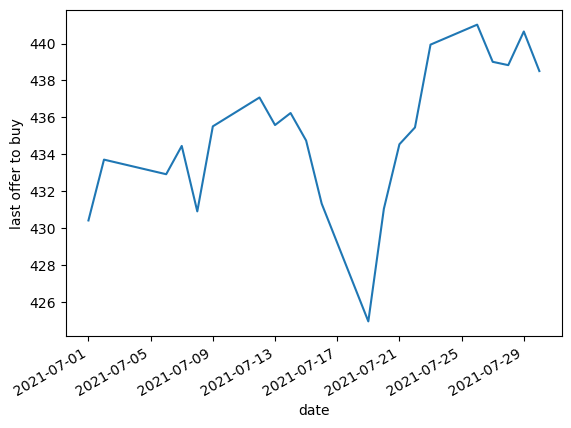

In [26]:
# plot last offer to buy over time
dataset.groupby('date')['adjusted_close'].median().plot()
plt.ylabel('last offer to buy')

We can plot multiple __histograms__, one for each of our __numerical continuous variables__.

Number of continuous variables:  19


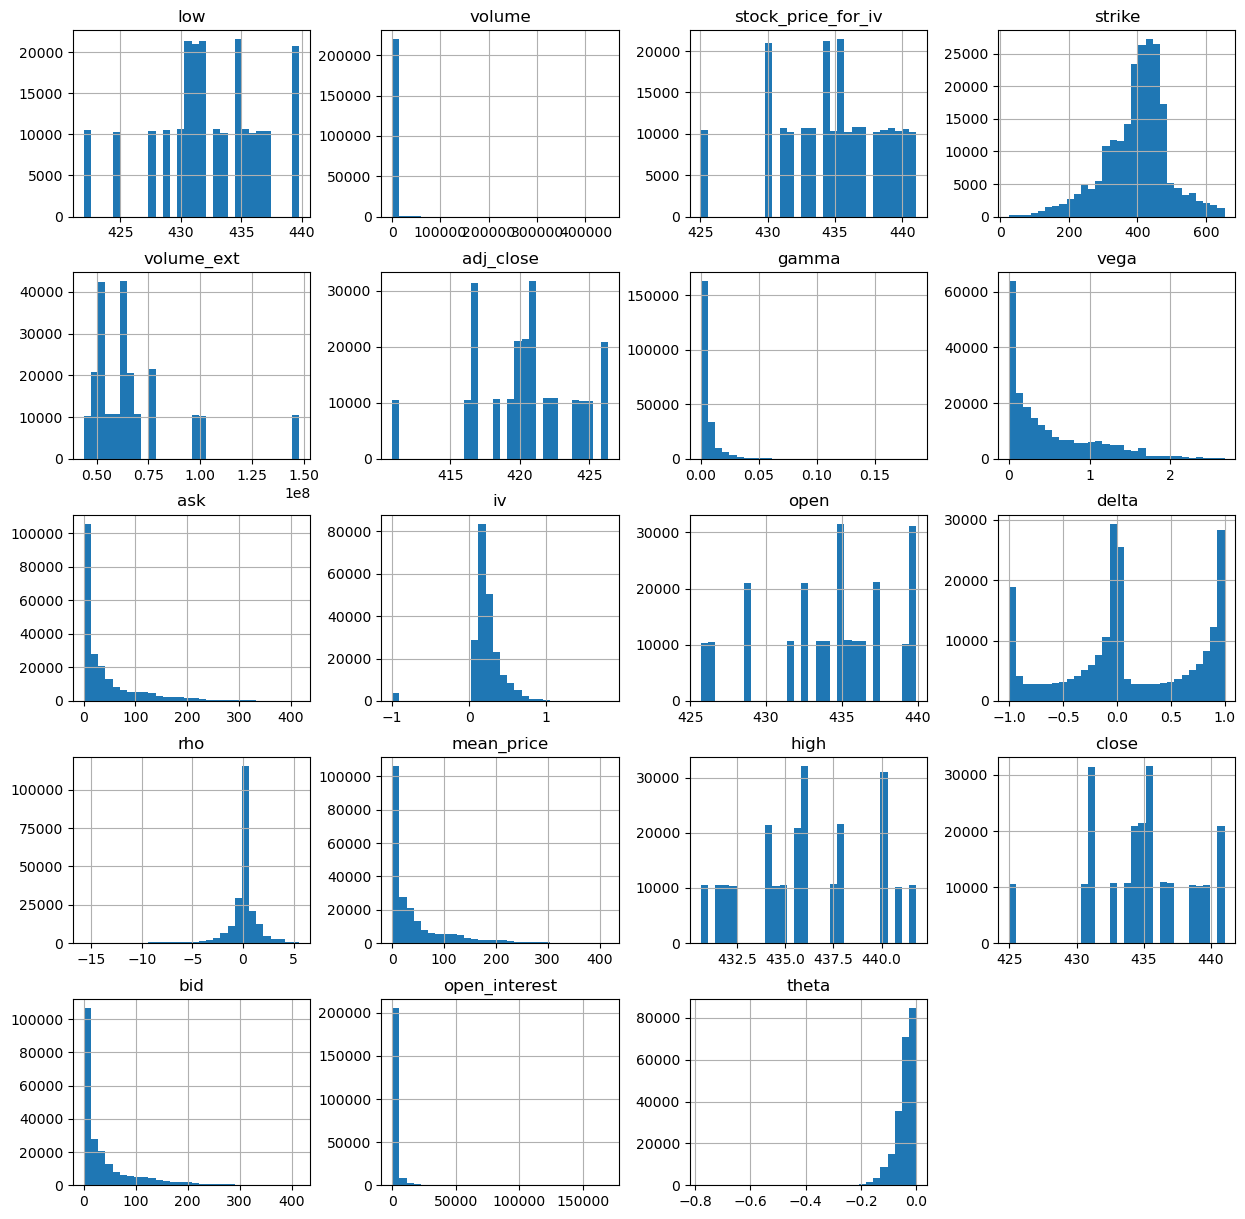

In [27]:
# lets plot histograms for all continuous variables
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in tem_vars]

print('Number of continuous variables: ', len(cont_vars))

dataset[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Now let's __split__ our data in our __train__ and __test__ datasets.

Remember we are __targeting__ the __'adjusted_close'__ column on July 30, 2021, based on the data from July 1 to 29.

In [28]:
target = 'adjusted_close'
X = dataset.drop([target],axis=1)
X = X.drop(['date','expiration'], axis=1)
Y = dataset[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (221046, 20) (221046,) 
Training set  --->  (176836, 20) (176836,) 
Testing set   --->  (44210, 20)  (44210,)


In [29]:
qual_mappings = {'C': 1, 'P': 2}
Train_X['call_put'] = Train_X['call_put'].map(qual_mappings) #One Hot Encoding
LR = LinearRegression()
LR.fit(Train_X, Train_Y)

LinearRegression()

In [30]:
qual_mappings = {'C': 1, 'P': 2}
Test_X['call_put'] = Test_X['call_put'].map(qual_mappings)
pred1 = LR.predict(Test_X)

# Stage 8 - Data Visualization

We __communicate__ the __analysis results__ to the business users.

In this case, we will __plot__ the __predicted value__ of __'adjusted_close'__, based on our linear regression model.

Text(0, 0.5, 'Actual adjusted_close')

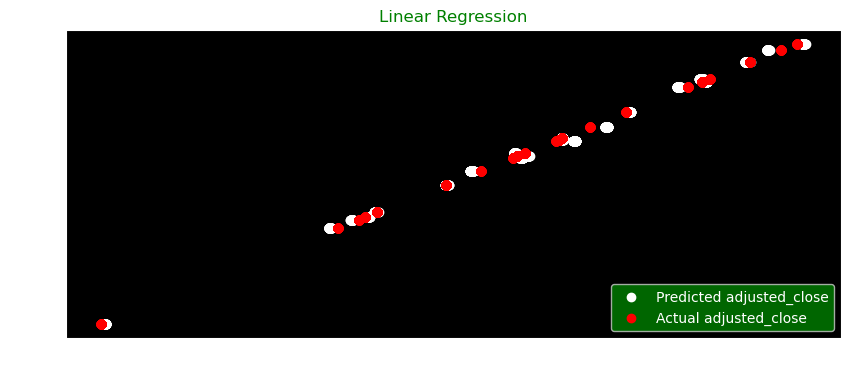

In [31]:
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(pred1, Test_Y, color="white")
plt.scatter(Test_Y, Test_Y, color="red")
plt.legend(["Predicted adjusted_close", "Actual adjusted_close", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')
plt.xlabel('Predicted adjusted_close')
plt.ylabel('Actual adjusted_close')


As we can see, the __predicted adjusted_close values__ (white dots) are similar to the __actual adjusted_close values__ (red dots) from July 30, 2021

; therefore showing a __high accuracy__ on our Linear Regression __model__

This means that, __based on the stock market values__ from a month, we could __predict__ the closing price of the underlying stock after extended trading session __(adjusted_close)__ on the SPY stocks.

# Stage 9 - Utilization of Analysis Results



Given the results, we would have to __perform more iterations__ on our data analysis __to accurately predict__ the __adjusted_close__ value on July 30, 2021.

However, the prediction of our linear regression model is similar to the actual values, but __shrinked to the right with an offset__.

By continue performing an __exploratory__ and __predictive analysis__, we could execute more tasks like:

- __deleting zero values__
-  identifying and deleting __outliers__

to present better results to the business users.

After we come with better results we could talk about __utilization of the analysis results__ in the following ways:

- As we succeed in predicting the adjusted_close value for the stocks on July 30, the business could deploy this linear regression model on their production environment to get a new predicition every month.
    
- The results could mark a precedent for the subsequent month and business users could act accordingly before the last day of the month comes.

- This will enhance the decision-making of traders, when buying stocks before they increase their last offer to buy.

- When applying these practices, the business could significantly increase their monthly revenue.

- As data scientists, we have to iteratively update the lineal regression model with newest datasets to have better and updated results.

# ========================================

# ========================================

# ========================================

# 1. Scaling
Let's apply a __standard scaling__ to our dataset __numerical variables__ and visualize the new results

First we need to identify the __numerical variables__ to apply a __Standard Scaling__

Then we identify the __categorical variables__ to apply __One Hot Encoding__

In [32]:
target = "adjusted_close" # Let's exclude our target first
columns_exclude = [target, 'date', 'expiration'] # Let's exclude date columns too
columns_predictors = [col for col in dataset.columns if col not in columns_exclude]
columns_categorical = ['call_put']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"Target: {target}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

Target: adjusted_close
columns_predictors: ['strike', 'call_put', 'ask', 'bid', 'mean_price', 'iv', 'volume', 'open_interest', 'stock_price_for_iv', 'delta', 'vega', 'gamma', 'theta', 'rho', 'open', 'high', 'low', 'close', 'adj_close', 'volume_ext']
columns_categorical: ['call_put']
columns_numerical: ['strike', 'ask', 'bid', 'mean_price', 'iv', 'volume', 'open_interest', 'stock_price_for_iv', 'delta', 'vega', 'gamma', 'theta', 'rho', 'open', 'high', 'low', 'close', 'adj_close', 'volume_ext']


With the variables identified we proceed to:

apply a __Standard Scaling (to our numerical variables)__ and One Hot Encoding (to our categorical variables).

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

# Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(drop='first')),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [34]:
pipeline_full.fit(Train_X)
X_train_CT = pipeline_full.transform(Train_X)
X_test_CT = pipeline_full.transform(Test_X)
print(f"X_train transformed.shape: {X_train_CT.shape}")
print(f"X_test transformed.shape: {X_test_CT.shape}")

X_train transformed.shape: (176836, 20)
X_test transformed.shape: (44210, 20)


Let's once again, __train__ our __model__ with these __scaled values__.

In [35]:
X_train_scaled = pd.DataFrame(X_train_CT)
X_test_scaled = pd.DataFrame(X_test_CT)

In [36]:
LR2 = LinearRegression()
LR2.fit(X_train_scaled, Train_Y)

LinearRegression()

In [37]:
pred_scaled = LR2.predict(X_test_scaled)

Text(0, 0.5, 'Closing price of underlying stock')

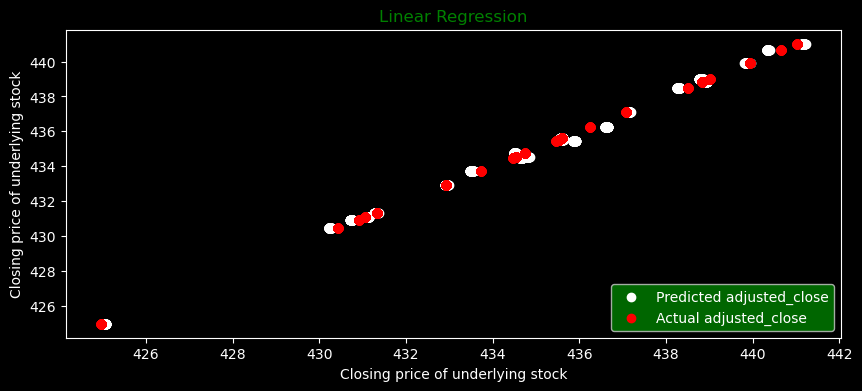

In [38]:
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(pred_scaled, Test_Y, color="white")
plt.scatter(Test_Y, Test_Y, color="red")
plt.legend(["Predicted adjusted_close", "Actual adjusted_close", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')
plt.xlabel('Closing price of underlying stock')
plt.ylabel('Closing price of underlying stock')


As we can see the __predicted values__ are very similar a closer to the __actual values__

Therefore indicating a __high accuracy__ and better __results__ when applying a __standard scale__ on our __numerical variables__.

# 2. Feature Engineering

First, let's check how our __variables__ are __correlating__ with each other.

Let's graph a __heat map__ indicating __correlation between__ our __variables__.

A value of __zero__ indicates __low correlation__, while a value of __1__ indicates __high correlation__ between 2 variables, and __-1__ indicates __inverse correlation__.

                                       Correlation Matrix                                       


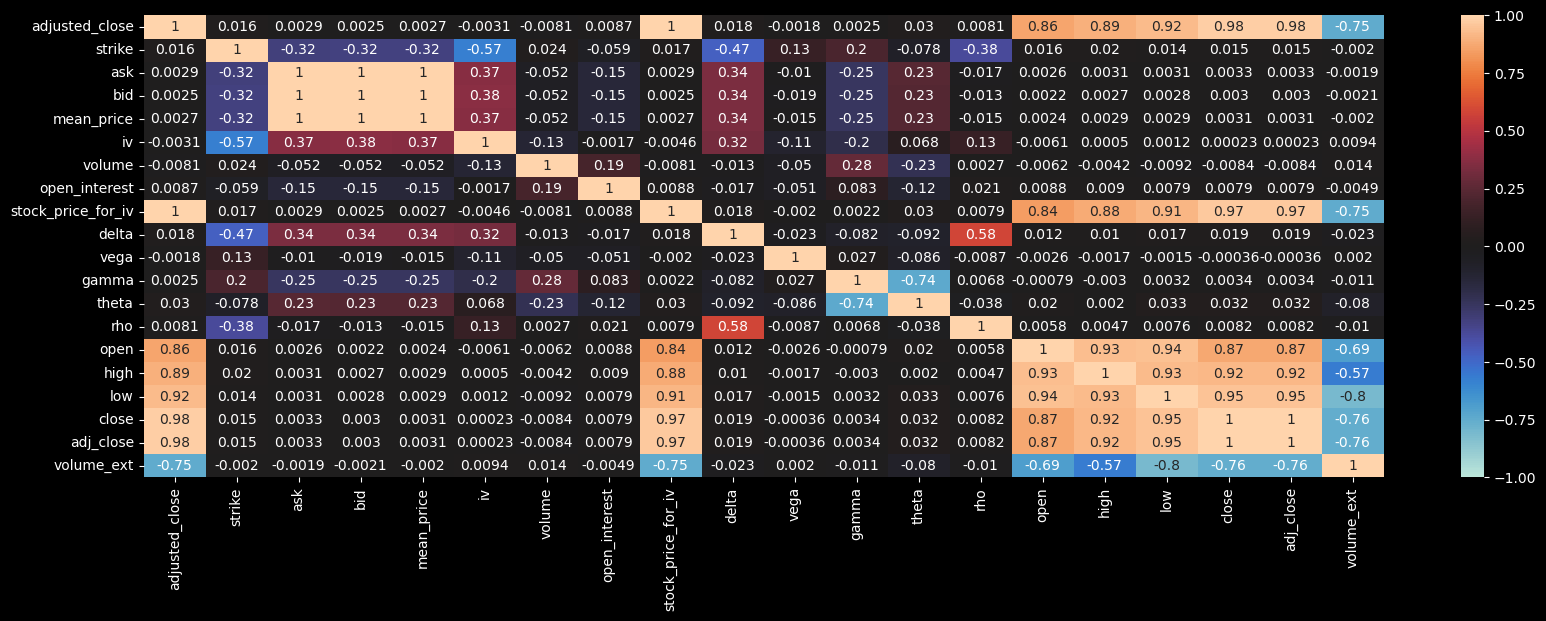

In [39]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[20,6])
sns.heatmap(dataset.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

With the correlation between our variables in mind,

we can __engineer__ a __new feature__ that leverages the __variables__ that are __highly correlated to our target__ adjusted_close variable

These variables are: 
- delta
- vega
- gamma
- theta
- rho

The new feature will be a sum of these 4 variables

Then we can add the feature to our scaled dataset as the 20th predictor variable

In [40]:
# Add the new feature on our train dataset
new_feature = X_train_scaled[11].abs() + X_train_scaled[12].abs() + X_train_scaled[13].abs() + X_train_scaled[14].abs() + X_train_scaled[15].abs()
X_train_scaled[20] = new_feature

# Add the new feature on our test dataset
new_feature = X_test_scaled[11].abs() + X_test_scaled[12].abs() + X_test_scaled[13].abs() + X_test_scaled[14].abs() + X_test_scaled[15].abs()
X_test_scaled[20] = new_feature

X_train_scaled
#X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.174843,0.166977,0.155407,0.161254,-0.148228,-0.078263,-0.047605,-0.139165,0.795273,...,-0.246268,0.328298,2.053189,-0.143275,-0.438292,-0.199800,-0.117524,-0.117519,-0.170032,3.209321
1,1.0,0.142862,-0.678683,-0.674408,-0.676548,-0.141733,-0.037887,-0.185969,-0.188688,-0.299591,...,0.385670,-1.355174,0.030911,0.136463,-0.194943,0.078100,-0.040907,-0.040901,-0.537993,2.103161
2,0.0,0.974379,-0.689101,-0.684768,-0.687021,-0.469919,-0.044129,-0.110994,0.223139,-0.165127,...,-0.594678,1.039960,0.038512,0.119434,-0.134894,0.300882,0.146665,0.146663,-0.854615,1.927477
3,0.0,0.430695,-0.566072,-0.561114,-0.563594,-0.426875,-0.050956,1.034150,-1.202618,0.458615,...,0.846197,-0.474534,0.248550,-1.330342,-1.395899,-1.116193,-1.052747,-1.052754,1.317244,4.295522
4,1.0,-0.891204,-0.688936,-0.684601,-0.686771,1.652414,-0.078263,-0.218243,0.952959,-0.166602,...,-0.609254,1.010218,0.038361,1.321096,1.312575,1.132291,1.036980,1.036980,-0.653932,4.291503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176831,1.0,1.187588,0.543672,0.548424,0.546078,-0.490947,-0.078263,-0.274019,0.223139,-1.794172,...,-0.611336,1.056414,0.038374,0.119434,-0.134894,0.300882,0.146665,0.146663,-0.854615,1.960452
176832,1.0,0.185504,-0.571033,-0.565960,-0.568498,-0.193011,-0.072412,0.127502,-0.047937,-0.644669,...,0.419645,-1.267195,-0.111333,-0.464368,-0.457253,-0.314636,-0.093748,-0.093742,-0.118707,2.719795
176833,1.0,0.281448,-0.687282,-0.682930,-0.685109,-0.333905,10.098698,3.965448,-1.226076,-0.282975,...,3.553687,-5.153214,0.037883,-1.308450,-1.753028,-0.822214,-1.182205,-1.182197,-0.611619,11.806263
176834,0.0,0.473337,-0.603940,-0.599213,-0.601578,-0.499475,-0.028524,-0.135489,1.211003,0.530782,...,1.966390,-1.287713,0.140006,0.795672,1.312575,1.012864,1.330234,1.330227,-0.160548,5.502356


Now we proceed to __train__ our Lineal Regression model and evaluate the results

In [41]:
LR3 = LinearRegression()
LR3.fit(X_train_scaled, Train_Y)


pred_new_feature = LR3.predict(X_test_scaled)

With our model trained, let's __evaluate the results__

Text(0, 0.5, 'Closing price of underlying stock')

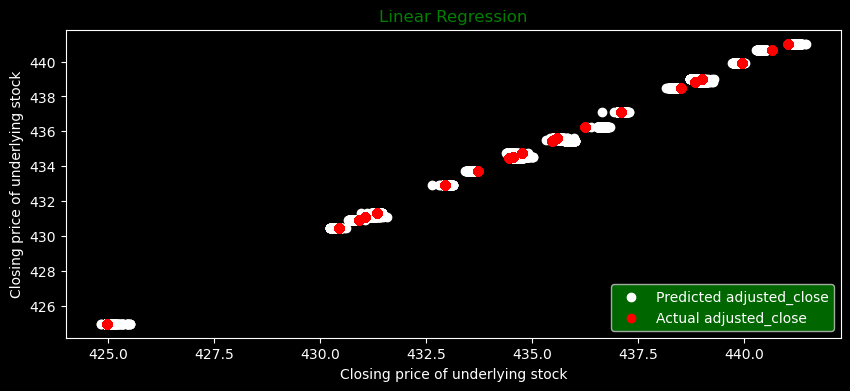

In [42]:
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(pred_new_feature, Test_Y, color="white")
plt.scatter(Test_Y, Test_Y, color="red")
plt.legend(["Predicted adjusted_close", "Actual adjusted_close", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')
plt.xlabel('Closing price of underlying stock')
plt.ylabel('Closing price of underlying stock')


The results show __improvement__ on the prediction for our adjusted_close value

However, the new feature made little improvement to the prediction beacause our prediction was already accurate

Maybe if we drop other low correlated (with our target) columns we can enhance our prediction even more.

For this we can apply PCA.

# 3. Dimension Reduction PCA

Let's rank the importance of each feature based on a Dimension Reduction PCA

Let's __apply PCA__ on our 21 predictive columns, including our new feature

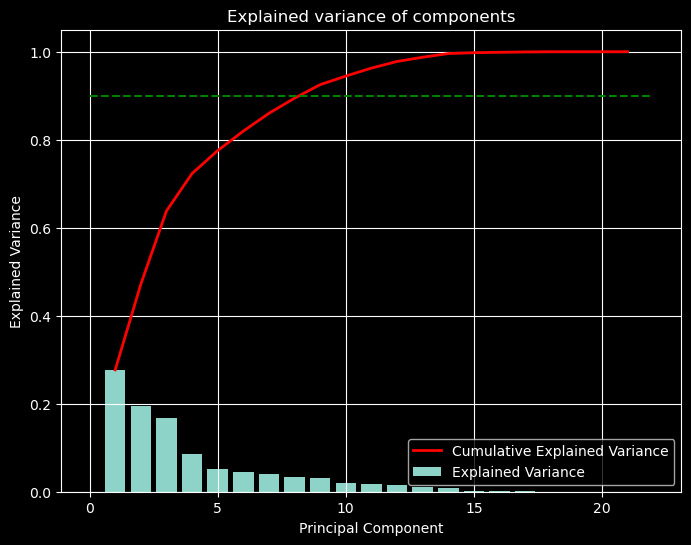

In [43]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

According to the graphic, we can visualize that __most__ of our __variables__ are __not__ that __important to predict__ our __target__ variable

Let's find out __which exact columns__ are __not important__ applying PCA

Features to drop-->  [18.0, 4.0, 2.0, 16.0, 17.0, 15.0, 0.0, 8.0, 11.0, 9.0, 19.0, 1.0, 3.0, 12.0, 6.0, 5.0, 20.0]


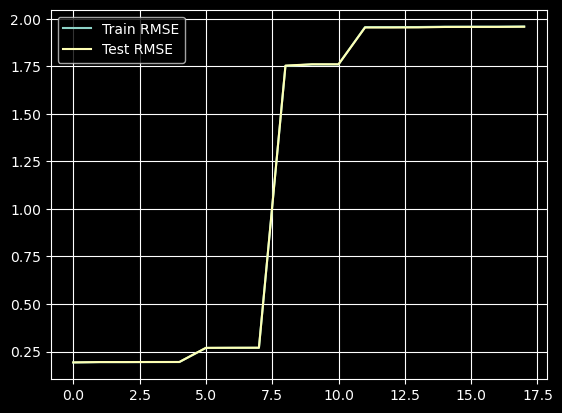

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

# Applying PCA to determine which columns to drop columns

DROP=[];b=[]
LR = LinearRegression()
LR.fit(X_train_scaled, Train_Y)

pred1 = LR.predict(X_train_scaled)
pred2 = LR.predict(X_test_scaled)

Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

for i in range(len(X_train_scaled.columns)-1):
    vif = pd.DataFrame()
    X = X_train_scaled.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] ##Reference
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(X_train_scaled.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(X_train_scaled.drop(DROP,axis=1))
        pred2 = LR.predict(X_test_scaled.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Features to drop--> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

Let's __drop the columns__ that are less important according to the PCA performed:

In [45]:
for col in DROP:
    X_train_scaled.drop([col], axis=1, inplace=True)
    X_test_scaled.drop([col], axis=1, inplace=True)

In [46]:
X_train_scaled

,7,10,13,14
0,-0.047605,3.015793,2.053189,-0.143275
1,-0.185969,-0.696175,0.030911,0.136463
2,-0.110994,-0.918491,0.038512,0.119434
3,1.034150,0.521827,0.248550,-1.330342
4,-0.218243,-0.922912,0.038361,1.321096
...,...,...,...,...
176831,-0.274019,-0.923922,0.038374,0.119434
176832,0.127502,0.284162,-0.111333,-0.464368
176833,3.965448,-0.867360,0.037883,-1.308450
176834,-0.135489,0.057195,0.140006,0.795672


Now we have determined our most __important features__ which are the __4__ columns:

- stock_price
- open
- high
- low

Let's use only these features to __train__ a __new model__

In [47]:
LR4 = LinearRegression()
LR4.fit(X_train_scaled, Train_Y)

pred_pca = LR4.predict(X_test_scaled)

Now let's __visualize and compare__ the __results__ when applying __PCA__

Text(0, 0.5, 'Closing price of underlying stock')

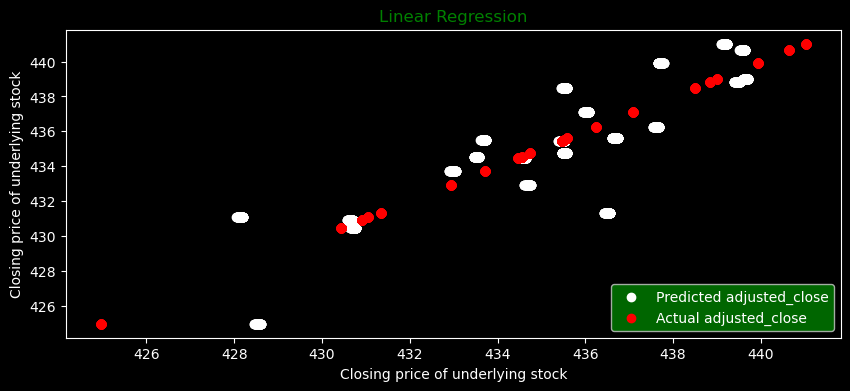

In [48]:
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(pred_pca, Test_Y, color="white")
plt.scatter(Test_Y, Test_Y, color="red")
plt.legend(["Predicted adjusted_close", "Actual adjusted_close", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')
plt.xlabel('Closing price of underlying stock')
plt.ylabel('Closing price of underlying stock')


Given only __4 relevant columns__ on our dataset and __dropping__ the rest of the __non-important columns__

We are left with these results (upper graphic), which in fact has a greater Mean Squared Error than previous results

This may be caused by the next reason:

- our __new dataset__ after applying PCA has __only 4 columns__ which may cause a __lack of relevant data__ to __correctly predict__ the __target__ variable

However, __given more important features__, we could __improve__ our __target prediction__ and have __better results__.

# References

- PCA Using Python: A Tutorial

https://builtin.com/machine-learning/pca-in-python

- Stock Market Analysis and Prediction using LSTM

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

- Stock Market Dataset

https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

- Yahoo stock market, finance, and business

https://ca.finance.yahoo.com/

- Understanding Relationship between features in Machine Learning

https://medium.com/@rameshkttr60/understanding-relationship-between-features-in-machine-learning-7c5f2e789b03

- Employer Salary Prediction

https://www.kaggle.com/code/yasserh/employee-salaray-prediction-best-ml-algorithms